In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### Univariate Analysis

In [7]:
df.describe(include= 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

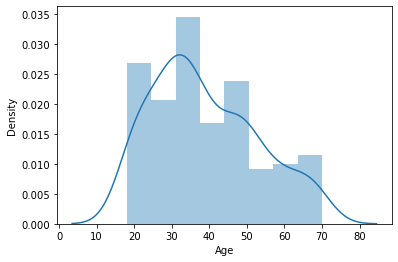

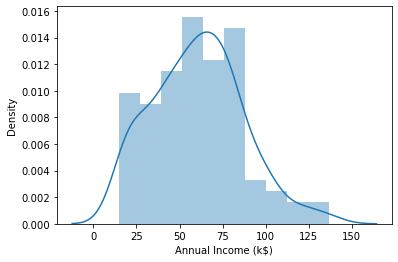

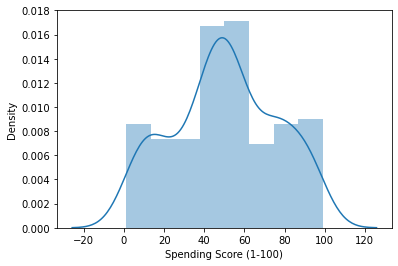

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

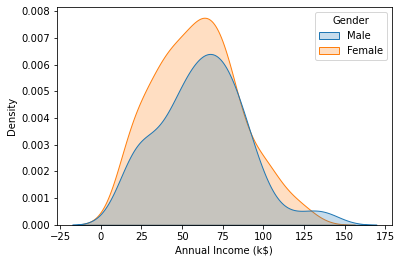

In [15]:
sns.kdeplot(x='Annual Income (k$)', data=df, shade=True, hue='Gender')

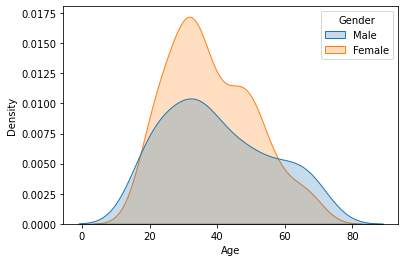

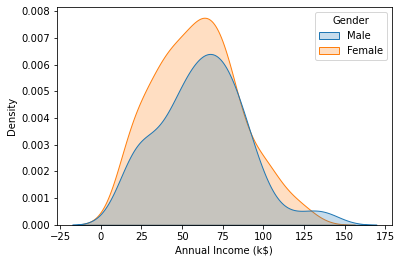

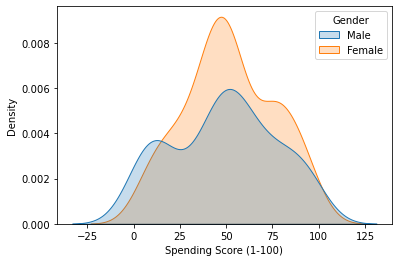

In [17]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=i,data=df,shade=True,hue='Gender')

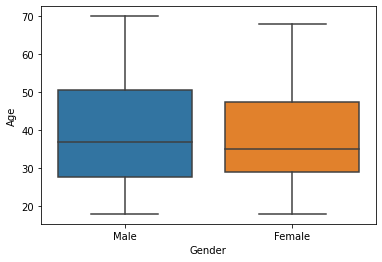

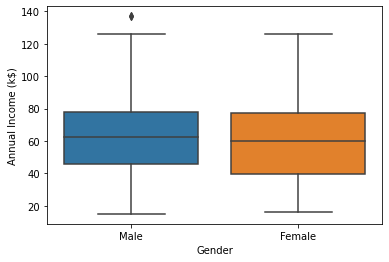

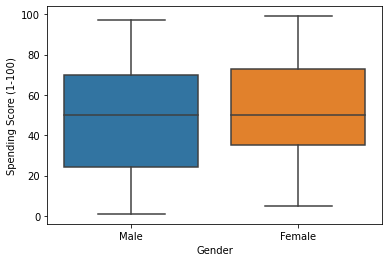

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [19]:
print(df['Gender'].value_counts())
df['Gender'].value_counts(normalize=True)


Gender
Female    112
Male       88
Name: count, dtype: int64


Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [25]:
df = df.drop(columns=['CustomerID'])

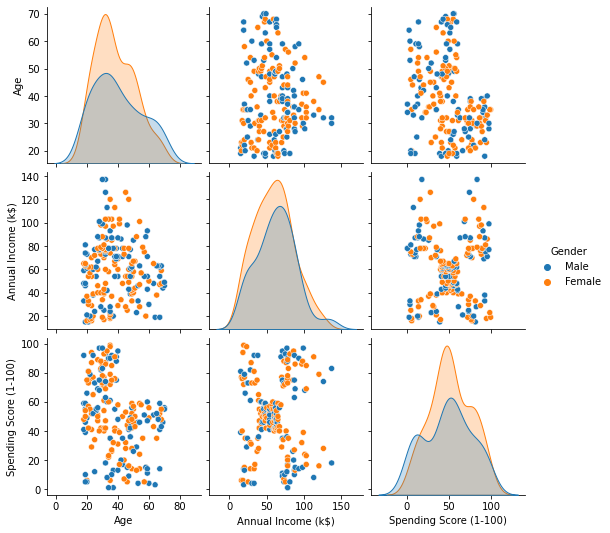

In [26]:
sns.pairplot(df,hue='Gender')

In [34]:


# Group by 'Gender' and calculate mean of specified columns
grouped_data = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
grouped_data


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [36]:
encoded_df = pd.get_dummies(df)  # One-hot encode categorical variables
correlation_matrix = encoded_df.corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.000000           -0.012398               -0.327227   
Annual Income (k$)     -0.012398            1.000000                0.009903   
Spending Score (1-100) -0.327227            0.009903                1.000000   
Gender_Female          -0.060867           -0.056410                0.058109   
Gender_Male             0.060867            0.056410               -0.058109   

                        Gender_Female  Gender_Male  
Age                         -0.060867     0.060867  
Annual Income (k$)          -0.056410     0.056410  
Spending Score (1-100)       0.058109    -0.058109  
Gender_Female                1.000000    -1.000000  
Gender_Male                 -1.000000     1.000000  


<Axes: >

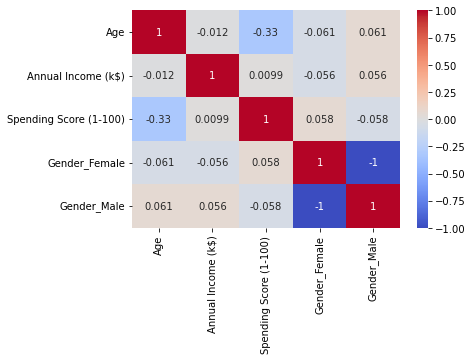

In [38]:
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')

In [39]:
numeric_df = df.drop(columns=['Gender'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

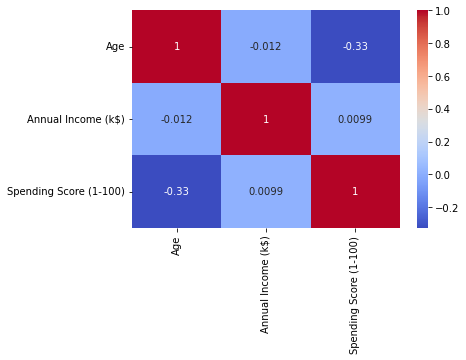

In [40]:
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')

In [41]:
#clustering univariate, bivariate, multivariate

In [71]:
clustering0 = KMeans()
clustering0.fit(df[['Annual Income (k$)']])
df['Income Cluster'] = clustering0.labels_

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,4
2,Female,20,16,6,1,2
3,Female,23,16,77,1,4
4,Female,31,17,40,1,2


In [72]:
clustering0.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [73]:
df['Income Cluster'].value_counts()

Income Cluster
0    42
7    36
1    32
2    28
5    26
4    16
6    14
3     6
Name: count, dtype: int64

In [43]:
clustering1 = KMeans(3)
clustering1.fit(df[['Annual Income (k$)']])


KMeans(n_clusters=3)

In [44]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [74]:
clustering0.inertia_

2822.4996947496948

In [45]:
clustering1.inertia_

23528.152173913044

In [46]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [47]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5081.484660267269,
 3962.567993600602,
 2822.4996947496948,
 2258.1100415923947,
 1786.8041125541124]

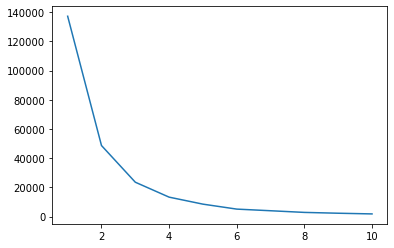

In [48]:
plt.plot(range(1,11),intertia_scores)

In [50]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


In [51]:
#Bivariate Clustering

In [52]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,4
2,Female,20,16,6,1,2
3,Female,23,16,77,1,4
4,Female,31,17,40,1,2


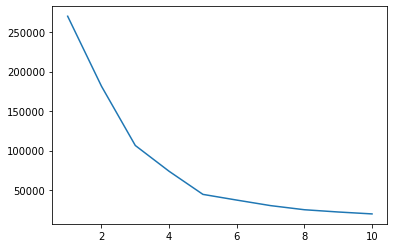

In [53]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [54]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

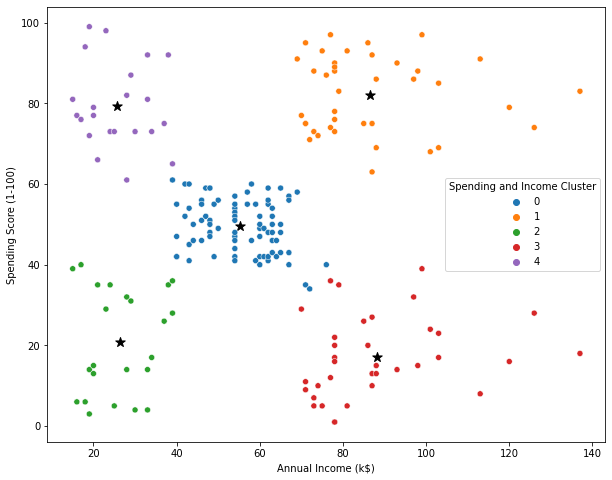

In [77]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [56]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.457143,0.542857
4,0.590909,0.409091


In [58]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [59]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [60]:
scale = StandardScaler()

In [61]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,4
2,Female,20,16,6,1,2
3,Female,23,16,77,1,4
4,Female,31,17,40,1,2


In [62]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,2,True
1,21,15,81,1,4,True
2,20,16,6,1,2,False
3,23,16,77,1,4,False
4,31,17,40,1,2,False


In [63]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [64]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [65]:
dff = scale.fit_transform(dff)

In [66]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


[800.0, 588.8026767824938, 476.787554413516, 388.18166846173153, 326.4182681764844, 275.0499935623583, 236.83072236410828, 199.7166255966767, 174.1249392159928, 161.9928717620131]


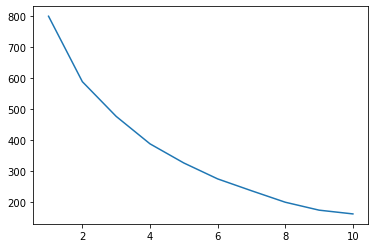

In [79]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
print(inertia_scores3)
plt.plot(range(1,11),inertia_scores3)

In [80]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,4
2,Female,20,16,6,1,2
3,Female,23,16,77,1,4
4,Female,31,17,40,1,2
...,...,...,...,...,...,...
195,Female,35,120,79,3,1
196,Female,45,126,28,3,3
197,Male,32,126,74,3,1
198,Male,32,137,18,3,3


In [81]:
df.to_csv('Clustering.csv')
